Garcia, Gilberto

ASTR5900

HW3 - Numerical Integration

14 February 2024


____

# Question 1

Write your own code(s) to carry out a numerical integration using both the Euler Method and a Runge-Kutta Method (either 2nd order or 4th order).


## a

Use your code to solve the equation

$$ \frac{dy}{dx} = y^2 + 1 $$

and compare your answer with the exact solution $y = \tan(x)$. Also compare (and show
and comment on) your results for both the Euler and Runge-Kutta methods, using the same number of steps for each.

## b

At what value of x does your numerical solution start to break down, and how does that relate to the derivative of $y(x)$? Use a plot and/or table of numbers to show this breakdown.

## c
Show that a decrease in step size increases your accuracy. Do you notice a difference in how much the accuracy improves for the Euler method, versus the Runge-Kutta?

## d

In real problems, we usually perform a numerical integration on a function for which there is no known analytic solution. If you have no way to know the true/exact solution, you can still check your numerical result by running several cases with different step sizes. This is called a convergence study. If your solution is working, you should see the final solution asymptotically approaching some value, as the step-size decreases. If your solution is indeed converging, you can then use the differences in your last few cases (with the smallest step sizes) to estimate the uncertainty/precision of your final answer.

Pretend like you don't know the exact solution to the equation above. Do a convergence study, calculating the fractional difference between your highest-resolution (smallest step- size) case and a few other lower-resolution cases (make a range of step sizes over at least a factor of 10-100). Plot the fractional difference as a function of step size on a log-log scale. Show the Euler and Runge-Kutta methods on the same plot. The slope in this log- log plot is often referred to as the order of convergence. Comment on what you see.

## e

Now consider the exact/known solution. Does your smallest fractional difference, between your two highest-resolution cases, well-represent the actual difference between your best solution and the exact solution (i.e., is this a good measure of the uncertainty in your result)?

___

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 1a

We first code our differential equation:

$$
\frac{dy}{dx} = y^2 + 1 = f(x,y)
$$

In [2]:
def dydx(x,y):
    return y**2 + 1

We now code our numerical integrators:

In [3]:
#we code the euler method first (a.k.a RK1):
def euler_integration(function,y0,x0,xf,num_of_steps):
    #we calculate the step size from the given boundary points and
    #num. of steps
    step_size = (xf - x0)/num_of_steps
    #we initialize our xi and yi to be the initial x and y given
    xi,yi = x0,y0
    #initialize our stepper
    stepper = x0
    #initialize the x and y list that we will write the values of each
    #iteration into
    x_lst,y_lst = [],[]
    #we will integrate up to our end boundary 
    while stepper <= xf:
        #write the current x and y values into our lists
        x_lst += [xi]
        y_lst += [yi]
        #update the y value using the euler step
        y_next = yi + (step_size * function(xi,yi))
        #update the x value by adding on a step size
        x_next = xi + step_size
        xi = x_next
        yi = y_next
        #updating our counter
        stepper += step_size
    return x_lst,y_lst

In [4]:
#we now code RK2 (Heun's Method):
def RK2(function,y0,x0,xf,num_of_steps):
    '''
    inputs:
        - function:
        - y0:
        - x0:
        - xf:
        - num_of_steps:
    outputs:
        - results
    '''
    #we calculate the step size from the given boundary points and
    #num. of steps
    step_size = (xf - x0)/num_of_steps
    #we initialize our xi and yi to be the initial x and y given
    yi = y0
    xi = x0
    #initialize our stepper
    stepper = x0
    #initialize lists to write x and y values to:
    x_lst,y_lst = [],[]
    #we will integrate up to our end boundary 
    while stepper <= xf:
        #write the current x and y values into our lists
        x_lst += [xi]
        y_lst += [yi]
        #print(xi,yi)
        #we calculate the K1 and K2 values needed for the RK2 step
        k1 = function(xi,yi)
        k2 = function(xi + step_size,yi + k1*step_size)
        #update our y value using the Rk2 step
        y_next = yi + (1/2)*(k1 + k2)*step_size
        #update our x value by adding a step size
        x_next = xi + step_size
        yi = y_next
        xi = x_next
        #update our counter
        stepper += step_size
    return x_lst,y_lst
        
        

We now define a few parameters to plot the Euler and RK2 solutions against the exact solution.

In [5]:
xinitial,xfinal = 0,np.pi/2.04
yinitial = np.tan(xinitial)
num_of_steps = 100

tan_x_values = np.linspace(xinitial,xfinal,num_of_steps)
tan_y_values = np.tan(tan_x_values)

x_lst_rk2,y_lst_rk2 = RK2(dydx,yinitial,xinitial,xfinal,num_of_steps)
x_lst_euler,y_lst_euler = euler_integration(dydx,yinitial,xinitial,xfinal,num_of_steps)

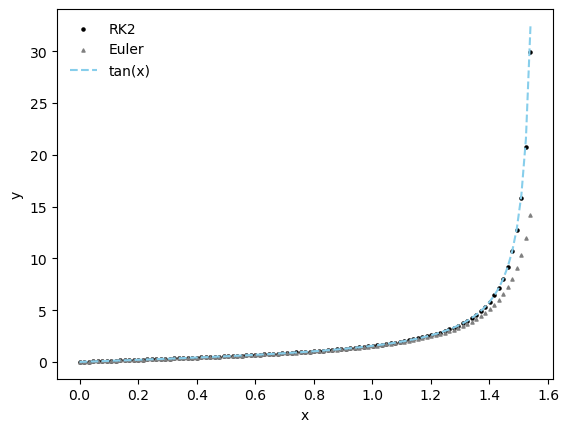

In [6]:
plt.scatter(x_lst_rk2,y_lst_rk2,s=5,color='black',label='RK2')
plt.scatter(x_lst_euler,y_lst_euler,s=5,color='gray',marker='^',label='Euler')
plt.plot(tan_x_values,tan_y_values,linestyle='--',color='skyblue',label='tan(x)')
plt.legend(frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The figure above shows the exact solution to the differential equation, along with the solution obtained from the Euler and Rk2 integrators. We used 100 steps on a range of 0 to $\frac{\pi}{2.04}$. As we approach our right bound, it is clear that the Euler integrator begins to diverge from the exact solution. Meanwhile, the RK2 method is matching up with the exact solution much better in this range.

## 1b

The boundary for the plot above was strictly chosen so that the divergent points of tan(x) aren't reached. Specifically, tan(x) approaches infinity as $x$ approaches $\frac{\pi}{2}$ from the left, which creates issues for our integrators.

To see this better, we can look at the derivative of tan(x) since the Euler and RK2 methods rely on the derivative of the solution to calculate the slope between successive points. The derivative of tan(x) is sec$^2(x)$. Let's plot it:

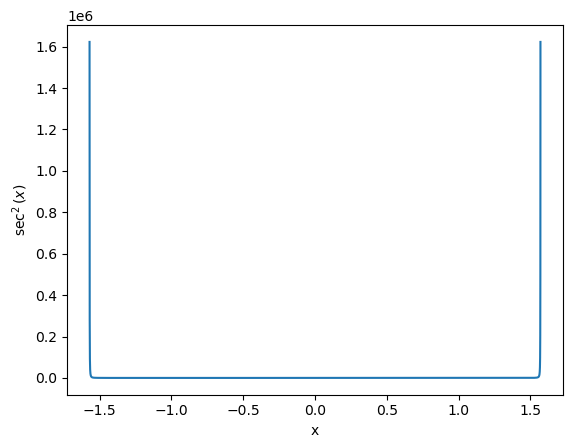

In [7]:
sec_x_values = np.linspace(-np.pi/2.001,np.pi/2.001,100_000)
sec_y_values = 1/(np.cos(sec_x_values))
plt.plot(sec_x_values,sec_y_values**2)
plt.ylabel(r'$\sec^2(x)$')
plt.xlabel('x')
plt.show()

We see that sec$^2(x)$ is growing rapidly at the boundaries of $\pm \frac{\pi}{2}$. This hints at the fact that we will have problems in our integrators at these values. Let's test it:

In [8]:
xinitial_1b,xfinal_1b = 0,np.pi/2.001
yinitial_1b = np.tan(xinitial_1b)
num_of_steps = 100

tan_x_values_1b = np.linspace(xinitial_1b,xfinal_1b,1_000)
tan_y_values_1b = np.tan(tan_x_values_1b)

x_lst_rk2_1b,y_lst_rk2_1b = RK2(dydx,yinitial_1b,xinitial_1b,xfinal_1b,num_of_steps)
x_lst_euler_1b,y_lst_euler_1b = euler_integration(dydx,yinitial_1b,xinitial_1b,xfinal_1b,num_of_steps)

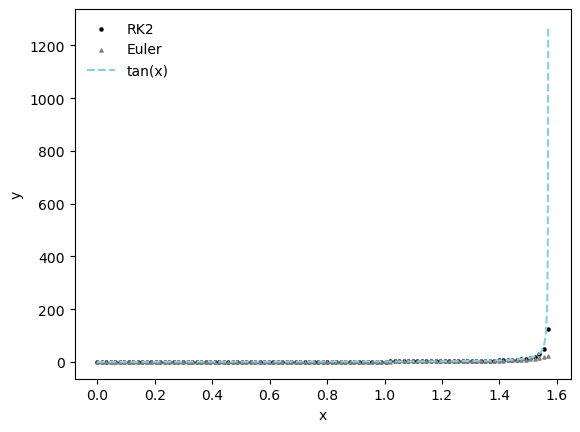

In [9]:
plt.scatter(x_lst_rk2_1b,y_lst_rk2_1b,s=5,color='black',label='RK2')
plt.scatter(x_lst_euler_1b,y_lst_euler_1b,s=5,color='gray',marker='^',label='Euler')
plt.plot(tan_x_values_1b,tan_y_values_1b,linestyle='--',color='skyblue',label='tan(x)')
plt.legend(frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

tan(x) increases at a rate too rapidly for our integrators too keep up. For each step in x, the step in y gets much larger.

## 1c

To show how the step size influences the accurary, let's plot similar plots to those above but a various step sizes:

In [10]:
xinitial_1c,xfinal_1c = 0,np.pi/2.2
yinitial_1c = np.tan(xinitial_1c)
xinitial_1c,xfinal_1c = 0,np.pi/2.01
tan_x_values_1c = np.linspace(xinitial_1c,xfinal_1c,10_000)
tan_y_values_1c = np.tan(tan_x_values_1c)

In [11]:
#steps: 10
steps1 = 5
x_lst_rk2_5,y_lst_rk2_5 = RK2(dydx,yinitial,xinitial,xfinal,steps1)
x_lst_euler_5,y_lst_euler_5 = euler_integration(dydx,yinitial,xinitial,xfinal,steps1)

#steps: 50
steps2 = 10
x_lst_rk2_10,y_lst_rk2_10 = RK2(dydx,yinitial,xinitial,xfinal,steps2)
x_lst_euler_10,y_lst_euler_10 = euler_integration(dydx,yinitial,xinitial,xfinal,steps2)


#steps: 100
steps3 = 100
x_lst_rk2_100,y_lst_rk2_100 = RK2(dydx,yinitial,xinitial,xfinal,steps3)
x_lst_euler_100,y_lst_euler_100 = euler_integration(dydx,yinitial,xinitial,xfinal,steps3)


#steps: 1000
steps4 = 1_000
x_lst_rk2_1000,y_lst_rk2_1000 = RK2(dydx,yinitial,xinitial,xfinal,steps4)
x_lst_euler_1000,y_lst_euler_1000 = euler_integration(dydx,yinitial,xinitial,xfinal,steps4)


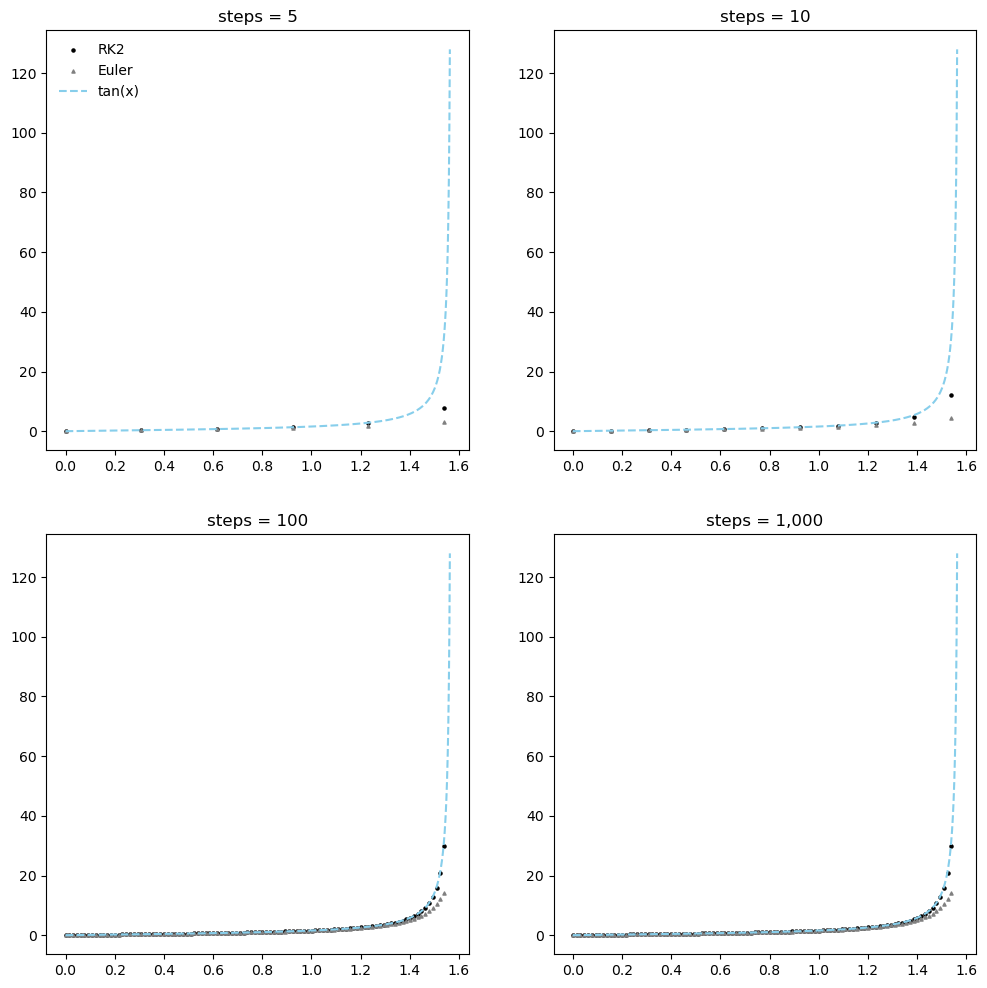

In [12]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
#fig.suptitle('increasing step size')
axs[0,0].scatter(x_lst_rk2_5,y_lst_rk2_5,s=5,color='black',label='RK2')
axs[0,0].scatter(x_lst_euler_5,y_lst_euler_5,s=5,color='gray',marker='^',label='Euler')
axs[0,0].plot(tan_x_values_1c,tan_y_values_1c,linestyle='--',color='skyblue',label='tan(x)')
axs[0,0].set_title('steps = 5')
axs[0,0].legend(frameon=False)

axs[0,1].scatter(x_lst_rk2_10,y_lst_rk2_10,s=5,color='black',label='RK2')
axs[0,1].scatter(x_lst_euler_10,y_lst_euler_10,s=5,color='gray',marker='^',label='Euler')
axs[0,1].plot(tan_x_values_1c,tan_y_values_1c,linestyle='--',color='skyblue',label='tan(x)')
axs[0,1].set_title('steps = 10')

axs[1,0].scatter(x_lst_rk2_100,y_lst_rk2_100,s=5,color='black',label='RK2')
axs[1,0].scatter(x_lst_euler_100,y_lst_euler_100,s=5,color='gray',marker='^',label='Euler')
axs[1,0].plot(tan_x_values_1c,tan_y_values_1c,linestyle='--',color='skyblue',label='tan(x)')
axs[1,0].set_title('steps = 100')

axs[1,1].scatter(x_lst_rk2_100,y_lst_rk2_100,s=5,color='black',label='RK2')
axs[1,1].scatter(x_lst_euler_100,y_lst_euler_100,s=5,color='gray',marker='^',label='Euler')
axs[1,1].plot(tan_x_values_1c,tan_y_values_1c,linestyle='--',color='skyblue',label='tan(x)')
axs[1,1].set_title('steps = 1,000')

plt.show()


Clearly, the accuracy of our integrators increases with more steps within the interval/decreasing step size. However, while RK2's accuracy increases rapidly (even from 5 steps to 10 steps), Euler's accuracy stagnates and never matches the exact solution (notice the similarities between 100 and 1,000 steps in the Euler curve).

## 1d

We want to plot the value at some right boundary as a function of step size. We choose the right boundary to be $\frac{\pi}{2.1}$.

In [14]:
xinitial_1d,xfinal_1d = 0,np.pi/2.1
yinitial_1d = np.tan(xinitial_1d)

In [52]:
num_of_steps_arr = np.linspace(100,1000,50)

#num_of_steps_arr = [100,1_000,10_000,100_000,1_000_000]

step_size = []
euler_answer,rk2_answer = [],[]
for steps in num_of_steps_arr:
    step_size += [(xfinal_1d - xinitial_1d)/steps]
    rk2_xlst_1d,rk2_ylst_1d = RK2(dydx,yinitial,xinitial_1d,xfinal_1d,steps)
    euler_xlst_1d,euler_ylst_1d = euler_integration(dydx,yinitial_1d,xinitial_1d,xfinal_1d,steps)
    euler_answer += [euler_ylst_1d[-1]]
    rk2_answer += [rk2_ylst_1d[-1]]
    
    

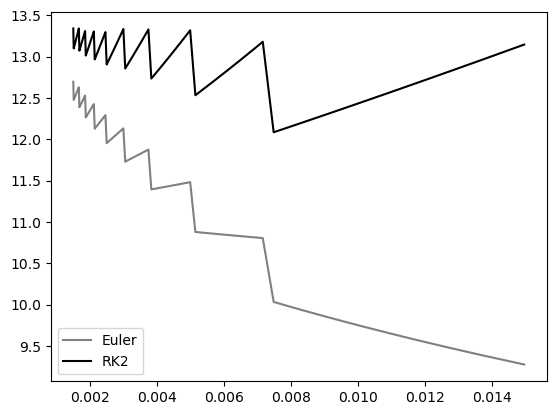

In [51]:
plt.plot(step_size,euler_answer,color='gray',label='Euler')
plt.plot(step_size,rk2_answer,color='black',label='RK2')
plt.legend()
plt.show()

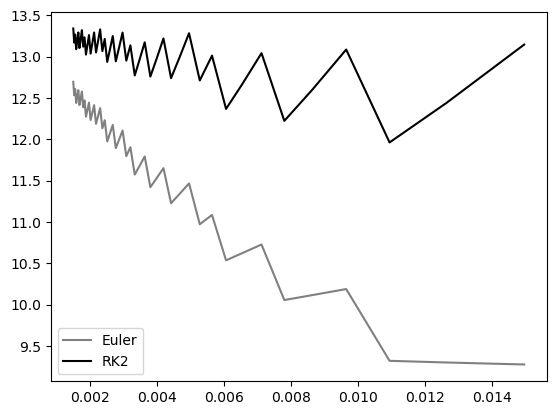

In [53]:
plt.plot(step_size,euler_answer,color='gray',label='Euler')
plt.plot(step_size,rk2_answer,color='black',label='RK2')
plt.legend()
plt.show()